In [1]:
from transformer_payne import TransformerPayne
from spice.spectrum import apply_spectral_resolution
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import juliapkg
juliapkg.add("Korg", "acafc109-a718-429c-b0e5-afd7f8c7ae46")
juliapkg.resolve()

[juliapkg] Found dependencies: /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /Users/mjablons/anaconda3/envs/astro/julia_env/pyjuliapkg/juliapkg.json
[juliapkg] Found dependencies: /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ~1.6.1, ~1.7, ~1.8, ~1.9, =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] Using Julia 1.11.5 at /Users/mjablons/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /Users/mjablons/anaconda3/envs/astro/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="Korg", uuid="acafc109-a718-429c-b0e5-afd7f8c7ae46"), Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d")])
           julia

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/anaconda3/envs/astro/julia_env/Project.toml`
  [acafc109] + Korg v0.44.0
⌅ [6099a3de] + PythonCall v0.9.23
    Updating `~/anaconda3/envs/astro/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.14.0
  [621f4979] + AbstractFFTs v1.5.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.18.0
  [13072b0f] + AxisAlgorithms v1.1.0
  [0e736298] + Bessels v0.2.8
  [336ed68f] + CSV v0.10.15
  [d360d2e6] + ChainRulesCore v1.25.1
  [944b1d66] + CodecZlib v0.7.8
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.16.0
  [992eb4ea] + CondaPkg v0.2.28
  [187b0558] + ConstructionBase v1.5.8
  [a8cc5b0e] + Crayons v4.1.1
  [717857b8] + DSP v0.8.3
  [9a962f9c] + DataAPI v1.16.0
  [a93c6f00] + DataFrames v1.7.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f]

True

In [2]:
from juliacall import Main as jl
jl.seval("using Korg"); Korg = jl.Korg

wls, flux_no_R, _ = Korg.synth(
    Teff=5000,
    logg=4.32,
    m_H=-1.1,
    C=-0.5,
    linelist=Korg.get_GALAH_DR3_linelist(),
    wavelengths=(5850, 5900)
)

korg_wavelengths = {}
korg_flux = {}
spice_flux = {}

for R in [2000, 10000, 50000, 100000, 1000000]:

    _wls, _flux, _ = Korg.synth(
        Teff=5000,
        logg=4.32,
        m_H=-1.1,
        C=-0.5,
        linelist=Korg.get_GALAH_DR3_linelist(),
        wavelengths=(5850, 5900),
        R=R
    )

    korg_wavelengths[R] = _wls
    korg_flux[R] = _flux
    spice_flux[R] = apply_spectral_resolution(jnp.log10(jnp.array(wls)), jnp.array(flux_no_R), R)


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Constructing cool dwarf atmosphere interpolator.  This will only happen once per process...


/Users/mjablons/Documents/stellar-mesh-integration/src/spice/spectrum/utils.py:80: UserWarning: Wavelengths are not uniformly spaced in log-space. This may lead to incorrect results.
  warnings.warn("Wavelengths are not uniformly spaced in log-space. This may lead to incorrect results.")


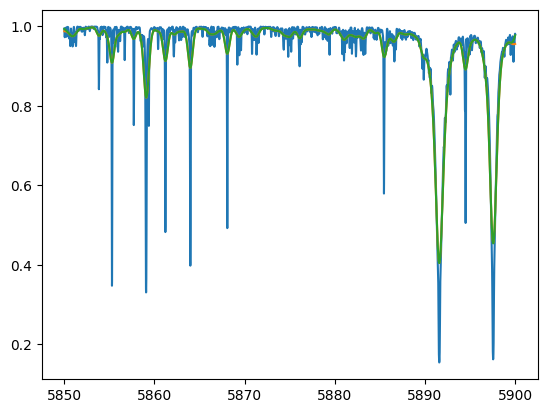

In [3]:
plt.plot(wls, flux_no_R)
plt.plot(wls, korg_flux[10000])
plt.plot(wls, spice_flux[10000])

Maximum residuals for each resolution:
R =    2000: 0.129467
R =   10000: 0.021617
R =   50000: 0.011826
R =  100000: 0.008483
R = 1000000: 0.000016


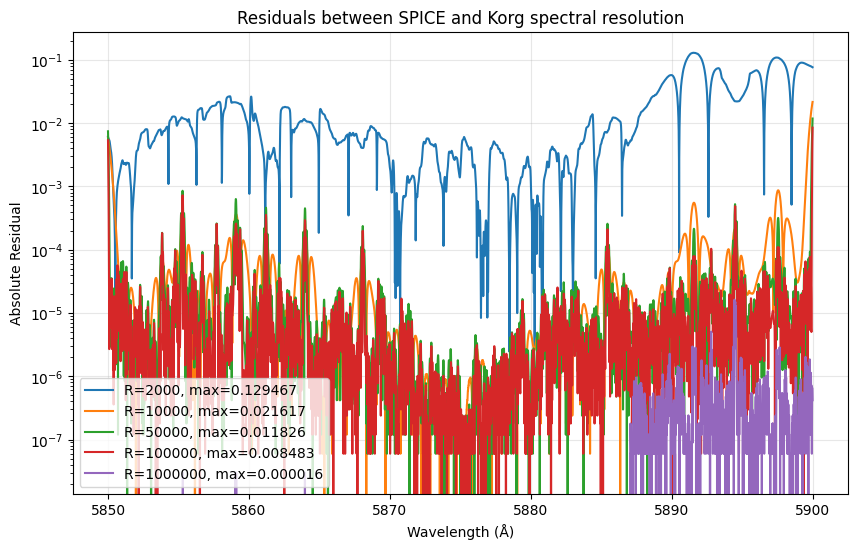

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure to compare residuals across different resolutions
plt.figure(figsize=(10, 6))

# Dictionary to store max residuals for each resolution
max_residuals = {}

# Loop through each resolution and calculate residuals
for R in [2000, 10000, 50000, 100000, 1000000]:
    # Calculate residuals between SPICE and Korg
    residuals = np.abs(spice_flux[R] - np.array(korg_flux[R]))
    max_residual = np.max(residuals)
    max_residuals[R] = max_residual
    
    # Plot the residuals
    plt.plot(wls, residuals, label=f'R={R}, max={max_residual:.6f}')

plt.xlabel('Wavelength (Å)')
plt.ylabel('Absolute Residual')
plt.title('Residuals between SPICE and Korg spectral resolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better visualize differences

# Print a summary of max residuals
print("Maximum residuals for each resolution:")
for R in sorted(max_residuals.keys()):
    print(f"R = {R:7d}: {max_residuals[R]:.6f}")


In [5]:
plt.plot(wls, flux)

NameError: name 'flux' is not defined